<a href="https://colab.research.google.com/github/ikyath/CardioVascularDiseaseDetection/blob/master/Cardiovascular_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pwd


'/content'

In [0]:
import pandas as pd

In [3]:
ls

drive/  sample_data/


In [4]:
cd /content/drive/My\ Drive/Data\ Science/Hackathon

/content/drive/My Drive/Data Science/Hackathon


In [0]:
train = pd.read_csv('cardio_train.csv',sep=';')

In [6]:
train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [7]:
train.shape

(69301, 13)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [9]:
train.cholesterol.unique()

array([2, 1, 3])

In [10]:
train.gluc.unique()

array([2, 1, 3])

In [11]:
train.smoke.unique()

array([0, 1])

In [12]:
train.alco.unique()

array([0, 1])

In [13]:
train.active.unique()

array([1, 0])

In [14]:
train.cardio.unique()

array([0, 1])

In [15]:
train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


 Number of Patients

In [16]:
train.shape[0]

69301

 Check for any duplicate entries of patients based on id

In [17]:
(train['id'].value_counts()>=2).sum()

0

In [18]:
train.gender.value_counts()

1    45079
2    24222
Name: gender, dtype: int64

In [19]:
train.cholesterol.value_counts()

1    51868
2     9446
3     7987
Name: cholesterol, dtype: int64

In [20]:
train.gluc.value_counts()

1    58885
3     5277
2     5139
Name: gluc, dtype: int64

In [21]:
train.smoke.value_counts()

0    63199
1     6102
Name: smoke, dtype: int64

In [22]:
train.alco.value_counts()

0    65567
1     3734
Name: alco, dtype: int64

In [23]:
train.active.value_counts()

1    55717
0    13584
Name: active, dtype: int64

The dataset to be classified as target variable is balanced.

In [24]:
train.cardio.value_counts()

0    34679
1    34622
Name: cardio, dtype: int64

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
features=['ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']

In [0]:
features_vif=['ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio']

In [0]:
scaler = StandardScaler().fit(train[features])
df_rescaled = scaler.transform(train[features])

X_train, X_test, y_train, y_test = train_test_split(train[features], train['cardio'], test_size=0.33, random_state=42)

In [0]:
import statsmodels.api as sm

In [0]:
logml = sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())


In [71]:
logml.fit().summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:942: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:942: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:943: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights
/usr/local/lib/python3.6/dist-packages/statsmodels/ge

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 cardio   No. Observations:                46431
Model:                            GLM   Df Residuals:                    46423
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 11 May 2020   Deviance:                          nan
Time:                        17:16:45   Pearson chi2:                 2.72e+16
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -6.6527      0.096    -69.296      0.000      -6.841      -6.465
ap_hi           0.0483      0.001     64.585      0.000       0.047       0.050
ap_lo           0.0006      0.000      4.359      0.000       0.000       0.001
cholesterol     0.5875      0.018     32.467      0.000       0.552       0.623
gluc           -0.0833      0.021     -4.025      0.000      -0.124      -0.043
smoke          -0.1689      0.039     -4.379      0.000      -0.244      -0.093
alco           -0.2024      0.049     -4.135      0.000      -0.298      -0.106
active         -0.2128      0.025     -8.379      0.000      -0.263      -0.163
===============================================================================
"""

In [0]:
def vif_cal(input_data,dependent_col):
    vif_df=pd.DataFrame( columns = ['Var','Vif'])
    x_vars=input_data.drop([dependent_col],axis=1)
    xvar_names = x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-rsq),2)
        vif_df.loc[i]=[xvar_names[i],vif]
    return vif_df.sort_values(by='Vif', axis=0, ascending=False,inplace=False)

In [73]:
vif_cal(input_data=train[features_vif],dependent_col="cardio")

,Var,Vif
3,gluc,5.85
2,cholesterol,5.69
6,active,3.37
0,ap_hi,1.61
1,ap_lo,1.24
4,smoke,1.23
5,alco,1.20


In [0]:
from sklearn import metrics

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

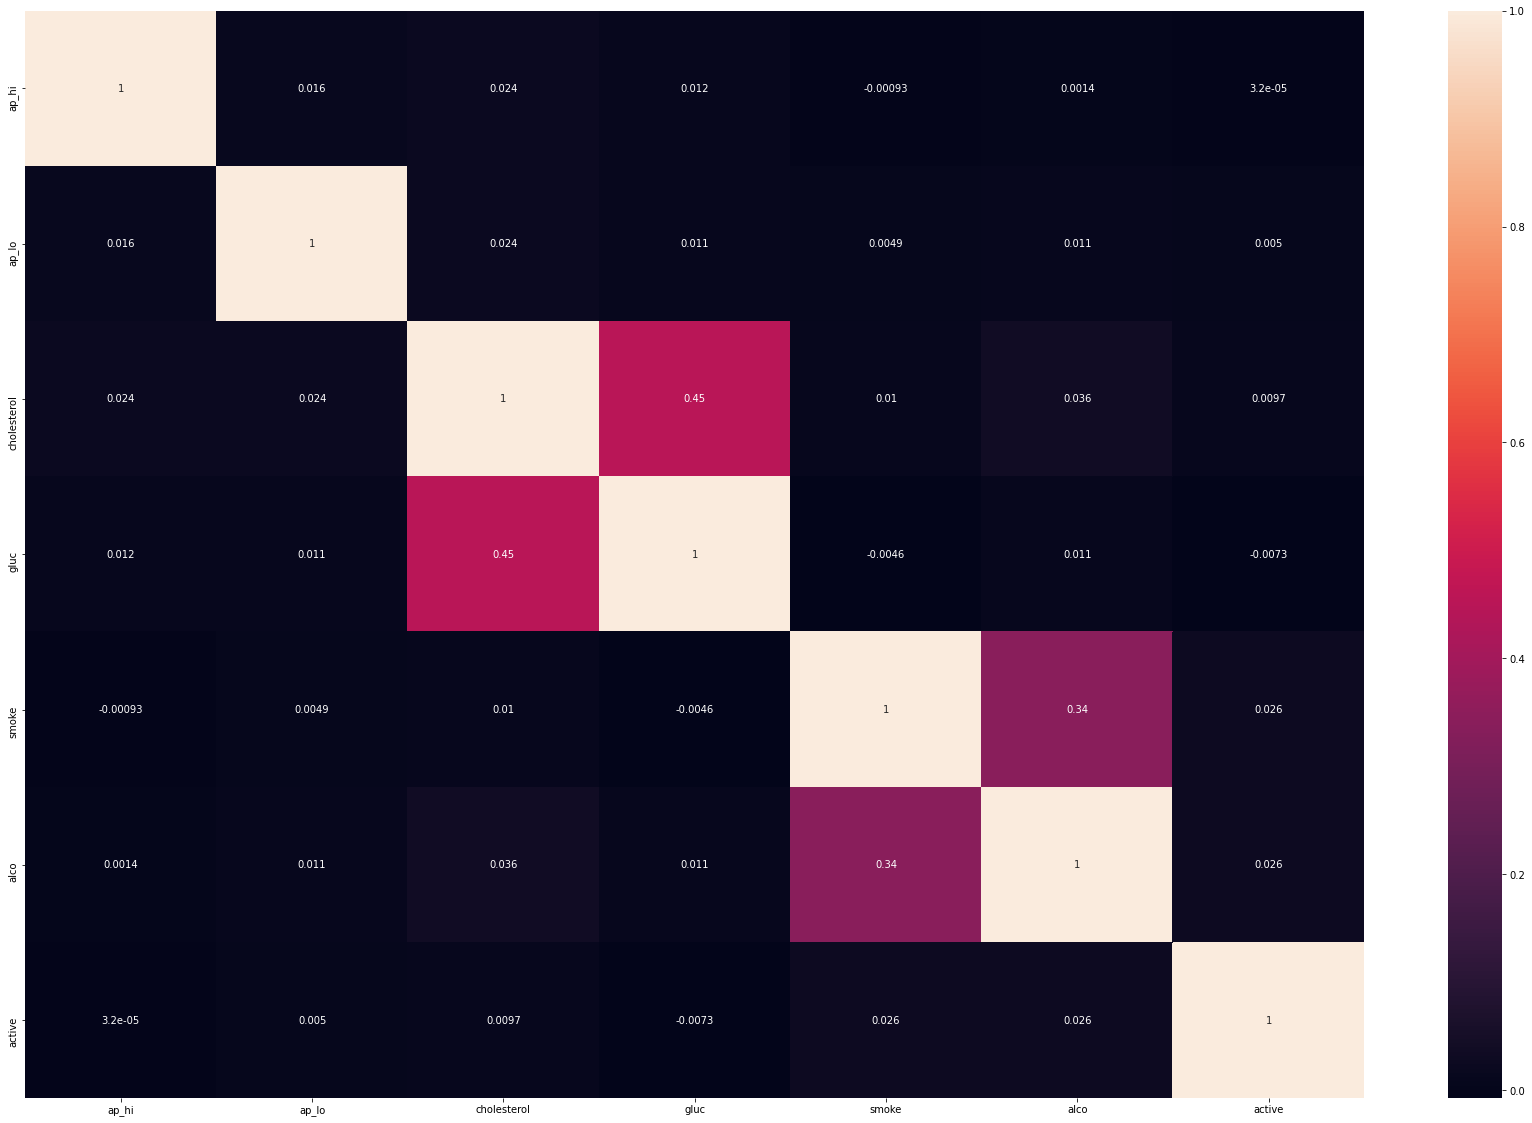

In [79]:
plt.figure(figsize=(30,20))
sns.heatmap(train[features].corr(),annot=True)


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [0]:
logreg = LogisticRegression()


In [82]:
logreg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred_log = logreg.predict(X_test)

In [84]:
print(accuracy_score(y_test,y_pred_log))

0.7207695671184958


In [85]:
confusion_matrix(y_test,y_pred_log)

array([[9042, 2336],
       [4050, 7442]])

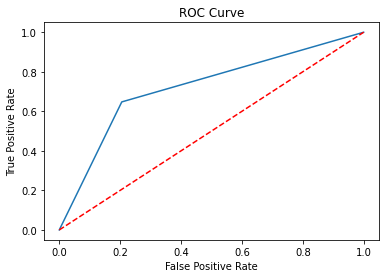

In [86]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_log)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [0]:
from sklearn.ensemble import RandomForestClassifier 

In [0]:
RFModel = RandomForestClassifier()

In [89]:
RFModel.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred_rf = RFModel.predict(X_test)

In [91]:
accuracy_score(y_test,y_pred_rf)

0.7235242675994753